# IDS Project:
# Dataset chosen: US Accidents in four years

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from pandas import Series,DataFrame
from scipy import stats
from scipy.stats import chi2_contingency
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [39]:
df=pd.read_csv("US_Accidents_May19.csv")
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


# Cleaning Dataset

## Cleaning numerical data

In [3]:
m = df['Severity'].mean()
df['Severity'].fillna(m, inplace=True)
m = df['Start_Lat'].mean()
df['Start_Lat'].fillna(m, inplace=True)
m = df['Start_Lng'].mean()
df['Start_Lng'].fillna(m, inplace=True)
m = df['Distance(mi)'].mean()
df['Distance(mi)'].fillna(m, inplace=True)
m = df['Temperature(F)'].mean()
df['Temperature(F)'].fillna(m, inplace=True)
m = df['Wind_Chill(F)'].mean()
df['Wind_Chill(F)'].fillna(m, inplace=True)
m = df['Humidity(%)'].mean()
df['Humidity(%)'].fillna(m, inplace=True)
m = df['Pressure(in)'].mean()
df['Pressure(in)'].fillna(m, inplace=True)
m = df['Visibility(mi)'].mean()
df['Visibility(mi)'].fillna(m, inplace=True)
m = df['Wind_Speed(mph)'].mean()
df['Wind_Speed(mph)'].fillna(m, inplace=True)
m = df['Precipitation(in)'].mean()
df['Precipitation(in)'].fillna(m, inplace=True)

## Cleaning categorical data

In [37]:
d = pd.Series(df['Start_Time'])
d.fillna(method='ffill')
d = pd.Series(df['End_Time'])
d.fillna(method='ffill')
d = pd.Series(df['Description'])
d.fillna(method='ffill')
try:
    d = pd.Series(df['Number'])
    d.fillna(method='ffill')
except:
    d = pd.Series(df['Number'])
    d.fillna(method='bfill')
d = pd.Series(df['Street'])
d.fillna(method='ffill')
d = pd.Series(df['Side'])
d.fillna(method='ffill')
d = pd.Series(df['City'])
d.fillna(method='ffill')
d = pd.Series(df['County'])
d.fillna(method='ffill')
d = pd.Series(df['State'])
d.fillna(method='ffill')
d = pd.Series(df['Zipcode'])
d.fillna(method='ffill')
d = pd.Series(df['Country'])
d.fillna(method='ffill')
d = pd.Series(df['Timezone'])
d.fillna(method='ffill')
d = pd.Series(df['Airport_Code'])
d.fillna(method='ffill')
d = pd.Series(df['Weather_Timestamp'])
d.fillna(method='ffill')
d = pd.Series(df['Wind_Direction'])
d.fillna(method='ffill')
d = pd.Series(df['Weather_Condition'])
d.fillna(method='ffill')
d = pd.Series(df['Amenity'])
d.fillna(method='ffill')
d = pd.Series(df['Bump'])
d.fillna(method='ffill')
d = pd.Series(df['Crossing'])
d.fillna(method='ffill')
d = pd.Series(df['Give_Way'])
d.fillna(method='ffill')
d = pd.Series(df['Junction'])
d.fillna(method='ffill')
d = pd.Series(df['No_Exit'])
d.fillna(method='ffill')
d = pd.Series(df['Railway'])
d.fillna(method='ffill')
d = pd.Series(df['Roundabout'])
d.fillna(method='ffill')
d = pd.Series(df['Station'])
d.fillna(method='ffill')
d = pd.Series(df['Stop'])
d.fillna(method='ffill')
d = pd.Series(df['Traffic_Calming'])
d.fillna(method='ffill')
d = pd.Series(df['Traffic_Signal'])
d.fillna(method='ffill')
d = pd.Series(df['Turning_Loop'])
d.fillna(method='ffill')
d = pd.Series(df['Sunrise_Sunset'])
d.fillna(method='ffill')
d = pd.Series(df['Civil_Twilight'])
d.fillna(method='ffill')
d = pd.Series(df['Nautical_Twilight'])
d.fillna(method='ffill')
d = pd.Series(df['Astronomical_Twilight'])
a=d.fillna(method='ffill')
df

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weekday
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 05:46:00,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Night,Monday
2016-02-08 06:07:59,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Day,Monday
2016-02-08 06:49:27,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,True,False,Night,Night,Day,Day,Monday
2016-02-08 07:23:34,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,Night,Day,Day,Day,Monday
2016-02-08 07:39:07,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,True,False,Day,Day,Day,Day,Monday
2016-02-08 07:44:26,A-6,MapQuest,201.0,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,...,False,False,False,False,False,Day,Day,Day,Day,Monday
2016-02-08 07:59:35,A-7,MapQuest,201.0,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,...,False,False,False,False,False,Day,Day,Day,Day,Monday
2016-02-08 07:59:58,A-8,MapQuest,201.0,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,...,False,False,False,False,False,Day,Day,Day,Day,Monday
2016-02-08 08:00:40,A-9,MapQuest,201.0,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,...,False,False,False,False,False,Day,Day,Day,Day,Monday


# Normalizing and Standardizing data

## Normalizing

In [5]:
normalized_X = preprocessing.normalize(df[['Severity','Start_Lat','Start_Lng','Distance(mi)','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']])
min_max_scaler = preprocessing.MinMaxScaler()
w=df[['Severity','Start_Lat','Start_Lng','Distance(mi)','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']]
np_scaled = min_max_scaler.fit_transform(w)
q=['Severity','Start_Lat','Start_Lng','Distance(mi)','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']
df_normalized = pd.DataFrame(np_scaled, columns = q)
df_normalized

C:\Users\THUSHAR KARANTH\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,0.75,0.626058,0.705349,0.000030,0.461755,0.827561,0.906250,0.898305,0.071429,0.009304,0.001852
1,0.50,0.628633,0.726694,0.000030,0.465781,0.827561,1.000000,0.897397,0.071429,0.009304,0.000000
2,0.50,0.593230,0.705803,0.000030,0.458132,0.892889,1.000000,0.898002,0.071429,0.002799,0.005596
3,0.75,0.621252,0.702796,0.000030,0.454509,0.872187,0.958333,0.897094,0.064286,0.004138,0.005596
4,0.50,0.616342,0.703095,0.000030,0.458132,0.892889,0.885417,0.897397,0.042857,0.002799,0.005596
5,0.75,0.635695,0.725059,0.000030,0.465781,0.912691,0.968750,0.896792,0.050000,0.002799,0.002778
6,0.50,0.621683,0.702362,0.000000,0.450081,0.872187,1.000000,0.897700,0.050000,0.002799,0.005596
7,0.75,0.622179,0.702981,0.000030,0.450081,0.872187,1.000000,0.897700,0.050000,0.002799,0.005596
8,0.50,0.622493,0.703380,0.000000,0.447262,0.827561,0.989583,0.898002,0.035714,0.000000,0.005596
9,0.75,0.635695,0.725059,0.000030,0.463768,0.897390,1.000000,0.896489,0.021429,0.004138,0.001852


## Standardizing

In [6]:
standardized_X = preprocessing.scale(w)
da=pd.DataFrame(standardized_X)
da.columns=q
da

C:\Users\THUSHAR KARANTH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,1.124826,0.685992,0.631602,-0.181363,-1.288887e+00,-2.038114e-13,1.134212e+00,-1.597188,0.298080,-9.768119e-13,-2.678911e-01
1,-0.697322,0.698679,0.703411,-0.181363,-1.235917e+00,-2.038114e-13,1.541349e+00,-1.731230,0.298080,-9.768119e-13,-4.003837e-01
2,-0.697322,0.524258,0.633130,-0.181363,-1.336560e+00,1.289077e+00,1.541349e+00,-1.641869,0.298080,-1.199457e+00,5.975789e-14
3,1.124826,0.662318,0.623011,-0.181363,-1.384232e+00,8.805751e-01,1.360400e+00,-1.775910,-0.042231,-9.525644e-01,5.975789e-14
4,-0.697322,0.638124,0.624019,-0.181363,-1.336560e+00,1.289077e+00,1.043737e+00,-1.731230,-1.063164,-1.199457e+00,5.975789e-14
5,1.124826,0.733472,0.697912,-0.181363,-1.235917e+00,1.679817e+00,1.405637e+00,-1.820590,-0.722853,-1.199457e+00,-2.016448e-01
6,-0.697322,0.664439,0.621553,-0.187889,-1.442499e+00,8.805751e-01,1.541349e+00,-1.686549,-0.722853,-1.199457e+00,5.975789e-14
7,1.124826,0.666881,0.623636,-0.181363,-1.442499e+00,8.805751e-01,1.541349e+00,-1.686549,-0.722853,-1.199457e+00,5.975789e-14
8,-0.697322,0.668430,0.624976,-0.187889,-1.479578e+00,-2.038114e-13,1.496112e+00,-1.641869,-1.403475,-1.715686e+00,5.975789e-14
9,1.124826,0.733472,0.697912,-0.181363,-1.262402e+00,1.377881e+00,1.541349e+00,-1.865271,-2.084097,-9.525644e-01,-2.678911e-01


# Plotting graphs and making inferences

There are 2243939 accidents in the data


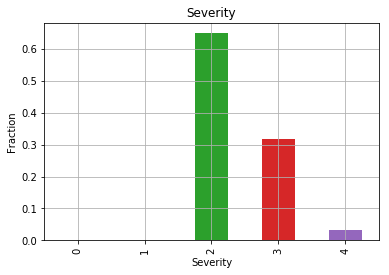

In [7]:
import datetime
print('There are {} accidents in the data'.format(len(df)))
df.Severity.value_counts(normalize=True).sort_index().plot.bar()
plt.grid()
plt.title('Severity')
plt.xlabel('Severity')
plt.ylabel('Fraction');

In [8]:
bool_cols = [col for col in df.columns if df[col].dtype ==np.dtype('bool')]
booldf = df[bool_cols]
not_one_hot = booldf[booldf.sum(axis=1) > 1]
print("There are {} non one hot metadata rows, which are {:.1f}% of the data".format(len(not_one_hot),100*len(not_one_hot)/len(df)))

There are 134798 non one hot metadata rows, which are 6.0% of the data


In [9]:
bools = booldf.sum(axis=0)

In [10]:
bools

Amenity             25977
Bump                  239
Crossing           121783
Give_Way             4724
Junction           187365
No_Exit              2166
Railway             18198
Roundabout            128
Station             36225
Stop                21771
Traffic_Calming       618
Traffic_Signal     358648
Turning_Loop            0
dtype: int64

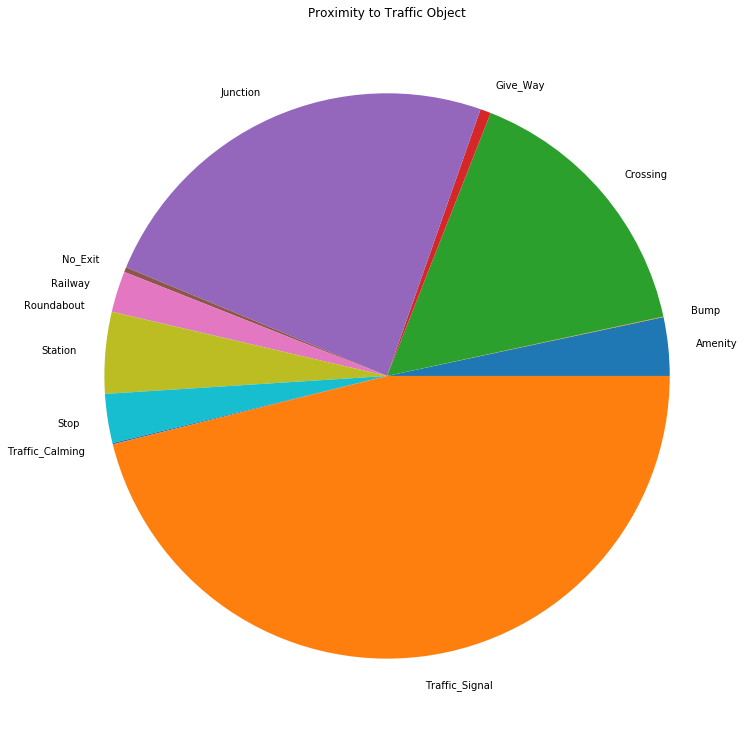

In [11]:
bools.plot.pie(figsize=(13,13))
plt.ylabel('')
plt.title('Proximity to Traffic Object');

In [12]:
st = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')
end = pd.to_datetime(df.End_Time, format='%Y-%m-%d %H:%M:%S')

top 20 accident durations correspond to 96.1% of the data


Text(0, 0.5, 'Fraction')

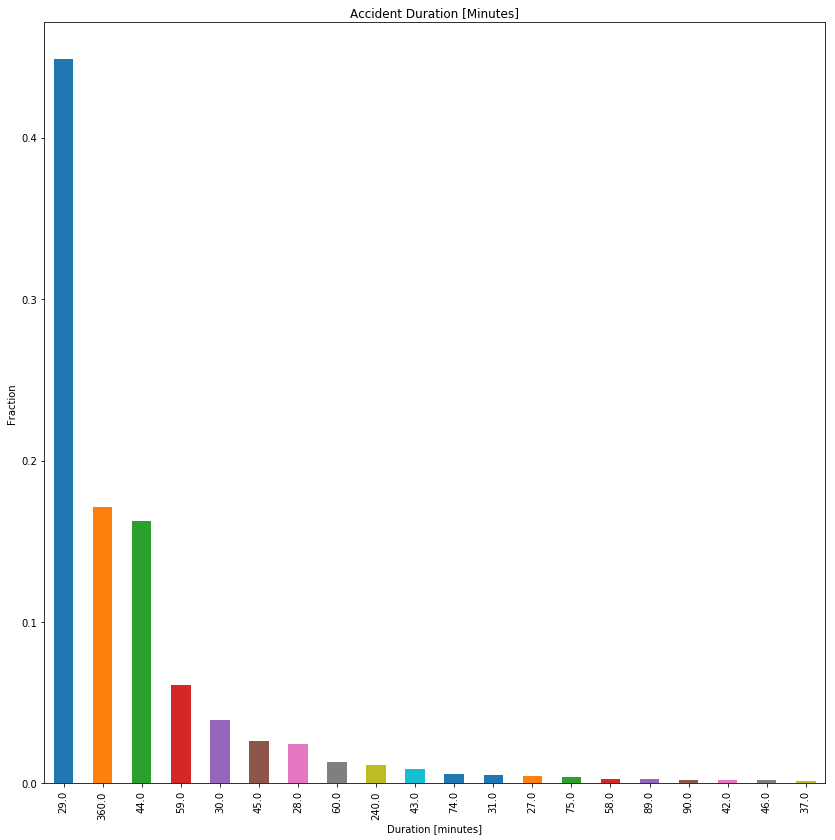

In [13]:
diff = (end-st)
top20 = diff.astype('timedelta64[m]').value_counts().nlargest(20)
print('top 20 accident durations correspond to {:.1f}% of the data'.format(top20.sum()*100/len(diff)))
(top20/top20.sum()).plot.bar(figsize=(14,14))
plt.title('Accident Duration [Minutes]')
plt.xlabel('Duration [minutes]')
plt.ylabel('Fraction')

## Most common durations are 'Below half an hour', 'exactly 1h', 'Below 3/4 of an hour', 'Below 1h' respectively. Hence they are probably approximate, and probably correspond to the time it took to resolve the accident rather than the accident itself

In [14]:
df['time'] = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')
df = df.set_index('time')
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 05:46:00,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
2016-02-08 06:07:59,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2016-02-08 06:49:27,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
2016-02-08 07:23:34,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
2016-02-08 07:39:07,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


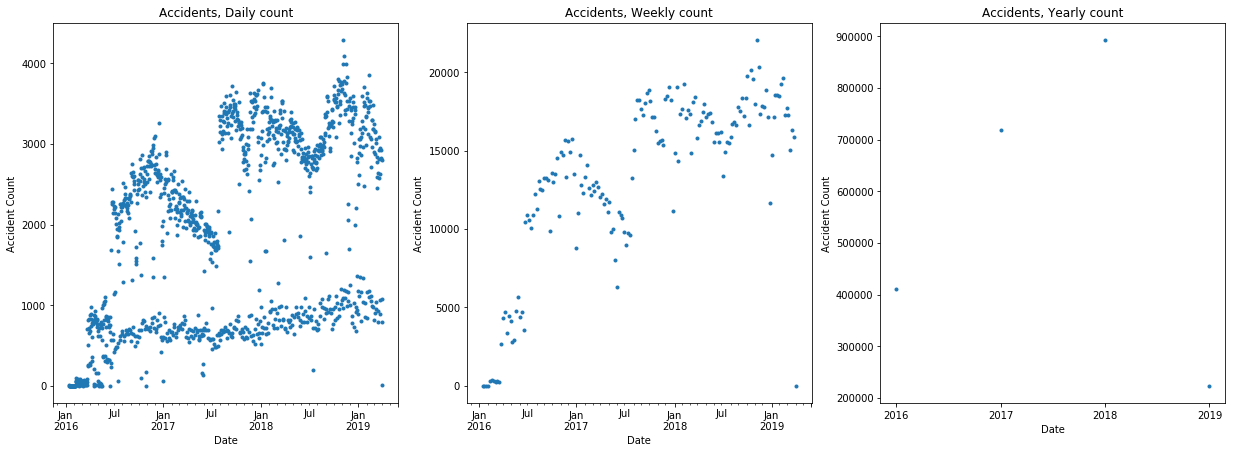

In [15]:
freq_text = {'D':'Daily','W':'Weekly','Y':'Yearly'}
plt.subplots(1,3,figsize=(21,7))
for i, (fr,text) in enumerate(freq_text.items(),1):
    plt.subplot(1,3,i)
    sample = df.ID['2016':].resample(fr).count()
    sample.plot(style='.')
    plt.title('Accidents, {} count'.format(text))
    plt.xlabel('Date')
    plt.ylabel('Accident Count');

## The are two populations for days (prob. weekday and weekend) as they merge when we look at weeks. There is some seasonal pattern, and the amount increases each year.

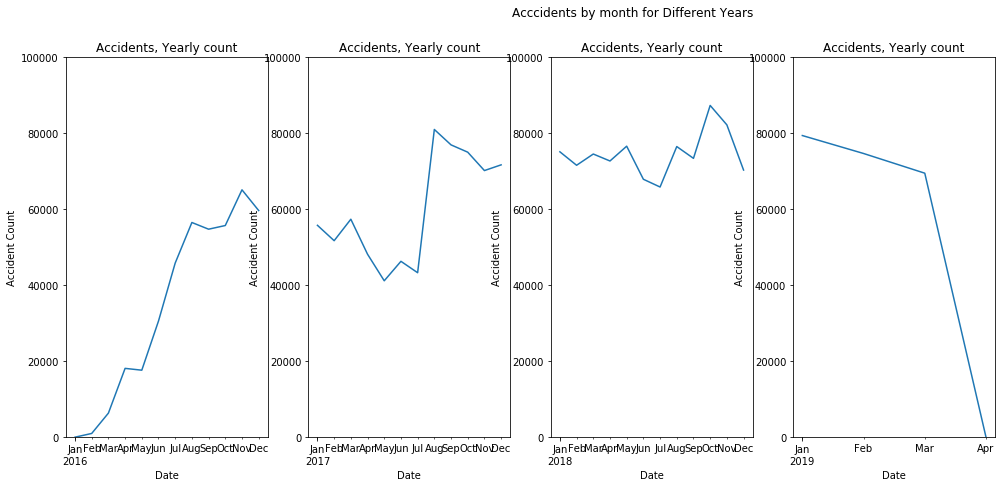

In [16]:
years = ['2016','2017','2018','2019']
fig, _ = plt.subplots(1,3,figsize=(21,7), sharex='all', sharey='all')

fig.suptitle('Acccidents by month for Different Years')
plt.xlabel('month')
plt.ylabel('Accidents')
for i, year in enumerate(years,1):
    plt.subplot(1,5,i)
    sample = df.loc[year].ID.resample('M').count()
    sample.plot()
    plt.ylim(0,100000)
    plt.title('Accidents, {} count'.format(text))
    plt.xlabel('Date')
    plt.ylabel('Accident Count');

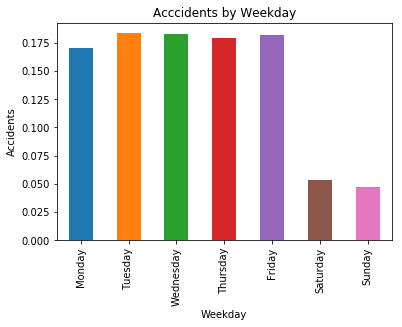

In [17]:
df['Weekday'] = df.index.weekday_name
weekday = df.groupby('Weekday').ID.count()
weekday = weekday/weekday.sum()
dayOfWeek=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday[dayOfWeek].plot.bar()
plt.title('Acccidents by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Accidents');

## From the graph it is clear that the number of accidents occur in weekdays is more compared to weekends.  

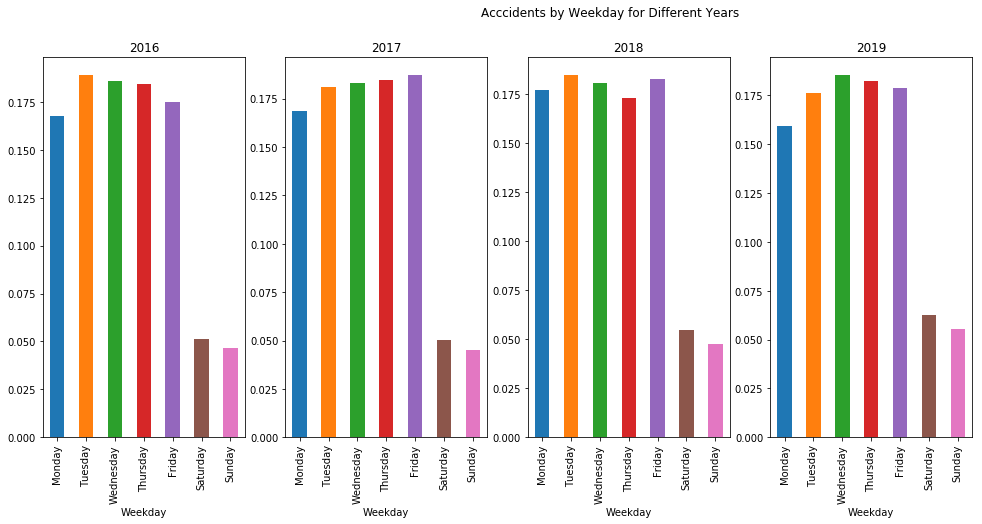

In [18]:
years = ['2016','2017','2018','2019']
fig, _ = plt.subplots(1,3,figsize=(21,7), sharex='all', sharey='all')

fig.suptitle('Acccidents by Weekday for Different Years')
plt.xlabel('Weekday')
plt.ylabel('Accidents')
for i, year in enumerate(years,1):
    weekday = df.loc[year].groupby('Weekday').ID.count()
    weekday = weekday/weekday.sum()
    dayOfWeek=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    plt.subplot(1,5,i)
    plt.title(year)
    weekday[dayOfWeek].plot.bar()

## Here no phenomenon is observed.

# Hypothesis testing

## Using Chi squared test (taking random sample of 100 from the dataset)

In [19]:
q=df[['Severity','Start_Lat','Start_Lng','Distance(mi)','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']]

### Assuming 
### H0:Temperature and Pressure are dependent.
### H1:Temperature and Pressure are independent.

In [36]:
df1=df.sample(n=100)
tables=pd.crosstab(df1['Temperature(F)'],df1['Pressure(in)'])
chi2, p, dof, expected=chi2_contingency(tables.values)
print('Chi-square statistic %0.3f p_value %0.3f' %(chi2,p))

Chi-square statistic 3726.111 p_value 0.130


### Here p>0.1 so we accept the H0 i.e., Pressure and Temperature are related.


### Assuming
### H0:Temperature and Humidity are dependent.
### H1:Temperature and Humidity are independent.

In [24]:
df1=df.sample(n=100)
tables=pd.crosstab(df1['Temperature(F)'],df1['Humidity(%)'])
chi2, p, dof, expected=chi2_contingency(tables.values)
print('Chi-square statistic %0.3f p_value %0.3f' %(chi2,p))

Chi-square statistic 3674.167 p_value 0.034


### Here p<0.1 so we reject the H0 i.e., Humidity and Temperature are not related.

### Assuming 
### H0:Severity and Visibility are dependent.
### H1:Severity and Visibility are independent.

In [29]:
df1=df.sample(n=100)
tables=pd.crosstab(df1['Severity'],df1['Visibility(mi)'])
chi2, p, dof, expected=chi2_contingency(tables.values)
print('Chi-square statistic %0.3f p_value %0.3f' %(chi2,p))

Chi-square statistic 17.913 p_value 0.329


### Here p>0.1 so we accept the H0 i.e., Severity and Visibility are related.

# Correlation

## Only Humidity vs Temperature graph has negative correlation

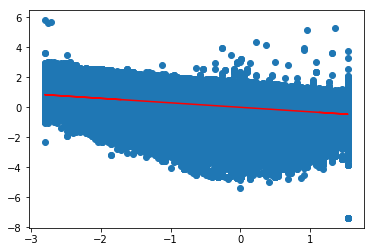

In [23]:
from sklearn.linear_model import LinearRegression
X = da.iloc[:, 6].values.reshape(-1, 1)  # values converts it into a numpy array
Y = da.iloc[:, 4].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y,)
plt.plot(X, Y_pred, color='red')
plt.show()